# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Prabha Sapkota 
### GitHub Link: https://github.com/prabhasapkota/web-scrapping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.50.0
html5lib           1.1
idna               3.6
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.3.2
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packagi

### Question 1:
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
import urllib.request
import pickle

# Function to fetch article HTML content from the provided URL
def fetch_article_html(url):
    try:
        with urllib.request.urlopen(url) as response:
            html_content = response.read().decode('utf-8')
            return html_content
    except Exception as e:
        print("Error occurred while fetching HTML:", str(e))
        return None

# URL of the webpage to scrape
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetching article HTML content
html_content = fetch_article_html(url)

# Saving HTML content to a .pkl file
if html_content:
    with open("article_content.pkl", 'wb') as f:
        pickle.dump(html_content, f)
    print("Content saved to article_content.pkl")
else:
    print("No content to save.")


Content saved to article_content.pkl


### Question 2:
 Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [11]:
import pickle
from bs4 import BeautifulSoup

with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

print(article_text)



















How Laser Headlights Work | Hackaday




















































































39 captures
22 Mar 2021 - 02 Aug 2023















Feb
MAR
Aug




27




2020
2021
2022







success
fail






















 About this capture






COLLECTED BY



		Organization: Internet Archive


	  Focused crawls are collections of frequently-updated webcrawl data from narrow (as opposed to broad or wide) web crawls, often focused on a single domain or subdomain.




Collection: top_domains-00250




TIMESTAMPS





The Wayback Machine - https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/






Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of au

### Question 3:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [51]:
	
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
tokens = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]

most_common_tokens = Counter(tokens).most_common(5)

print("Most common tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

all_tokens = Counter(tokens)
print("\nAll tokens with frequencies:")
for token, frequency in all_tokens.items():
    print(f"{token}: {frequency}")

Most common tokens:
div: 719
data: 594
laser: 365
headlights: 345
content: 327

All tokens with frequencies:
doctype: 1
html: 2
article: 134
includes: 5
script: 27
v: 1
javascript: 19
js: 137
bundle: 1
window: 6
ruffleplayer: 1
ruffle: 1
web: 5
laser: 365
headlights: 345
link: 164
css: 16
banner: 2
qtvmkcij: 2
end: 12
wayback: 8
rewrite: 1
include: 2
meta: 292
site: 8
verification: 4
image: 43
preview: 2
large: 8
device: 3
width: 7
initial: 1
color: 9
title: 7
work: 12
icon: 42
wp: 66
content: 327
themes: 9
lt: 1
ie: 4
jetpack: 5
tags: 3
prefetch: 10
feed: 3
comments: 290
emoji: 1
n: 1
r: 2
o: 2
t: 3
e: 1
document: 1
style: 6
smiley: 1
display: 3
inline: 5
important: 12
border: 1
box: 2
shadow: 1
height: 4
margin: 1
vertical: 1
align: 10
background: 2
padding: 1
dist: 1
block: 3
library: 2
mu: 2
plugins: 2
text: 9
justify: 1
ajax: 1
request: 2
extra: 4
var: 11
safecommentsajax: 1
json: 4
laserheadlight: 5
think: 15
onward: 3
march: 133
automotive: 13
technology: 17
usually: 3
thing: 6


### Question 4:
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [2]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from bs4 import BeautifulSoup
import pickle

# Load the article text from the .pkl file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and lemmatize tokens
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]

# Count lemma frequencies
lemma_counter = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the 5 most frequent lemmas with their frequencies
print("Top 5 most frequent lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas with their frequencies
print("\nAll lemmas with their frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")

Top 5 most frequent lemmas:
comment: 156
march: 133
report: 130
reply: 112
light: 99

All lemmas with their frequencies:
laser: 72
headlights: 7
work: 19
hackaday: 15
capture: 2
mar: 2
aug: 2
feb: 1
success: 1
fail: 7
collect: 1
organization: 1
internet: 2
archive: 1
focused: 4
crawl: 2
collection: 2
frequently: 2
update: 6
webcrawl: 1
datum: 2
narrow: 1
oppose: 1
broad: 1
wide: 1
web: 2
focus: 5
single: 2
domain: 1
subdomain: 1
timestamps: 1
wayback: 1
machine: 2
skip: 1
content: 1
primary: 1
menu: 1
home: 6
blog: 2
tindie: 2
prize: 3
submit: 2
search: 5
march: 133
comments: 1
lewin: 2
day: 11
think: 17
onward: 1
automotive: 10
technology: 17
headlight: 73
usually: 1
thing: 12
come: 17
mind: 6
engine: 3
fuel: 3
efficiency: 19
switch: 8
electric: 2
power: 13
mean: 9
thousand: 2
engineer: 4
world: 6
improve: 3
state: 4
art: 3
lighting: 16
seal: 4
beam: 53
way: 19
modern: 3
design: 14
regulation: 4
loosen: 1
bulb: 9
simple: 5
halogen: 7
xenon: 6
hids: 1
recently: 1
led: 30
new: 16
scene:

### Question 5:
 Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = sentence.split()
    score = sum(1 for token in tokens if token.lower() in interesting_tokens) / len(tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

first_sentence = "The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile."
interesting_tokens = ["laser", "headlights", "beams"]
interesting_lemmas = ["first", "laser", "headlight", "beams", "front", "automobiles"]

token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)

Token score: 0.08695652173913043
Lemma score: 0.19230769230769232


### Question 6:
 Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

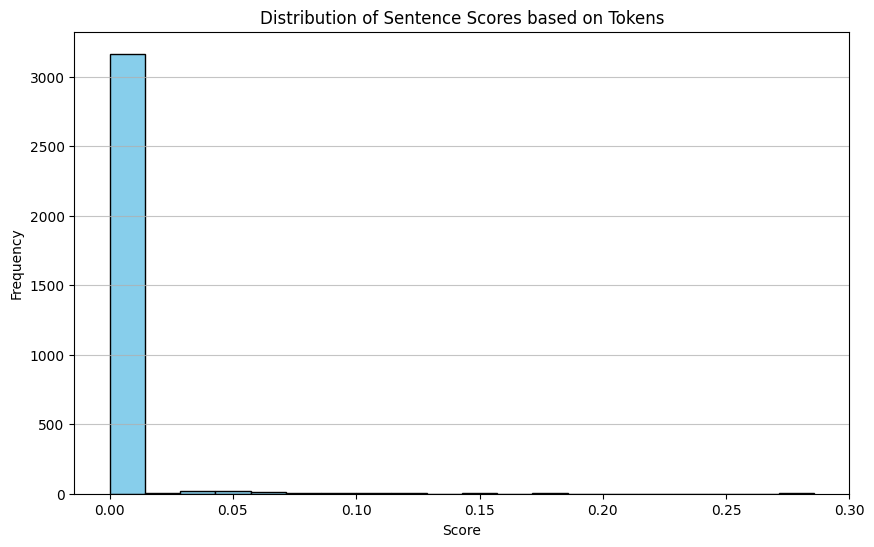

In [52]:
	
import matplotlib.pyplot as plt

sentences = article_text.split('.')
token_scores = [score_sentence_by_token(sentence, [token.lower() for token, _ in most_common_tokens]) for sentence in sentences if sentence.strip()]

plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Question 7:
 Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

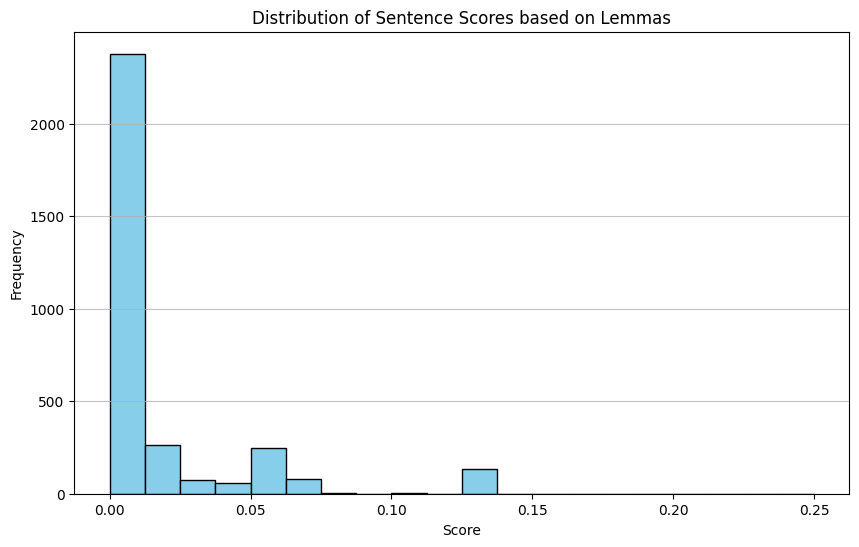

In [53]:
import pickle
import matplotlib.pyplot as plt

# Load the article content from the pickle file
with open('article_content.pkl', 'rb') as file:
    article_text = pickle.load(file)

# Tokenize the article into sentences
sentences = article_text.split('.')

# Calculate scores for each sentence using lemmas
lemma_scores = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in most_common_lemmas]) for sentence in sentences if sentence.strip()]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range of scores
# Insert your observation here


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).